Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.UCKO9U_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.UCKO9U_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


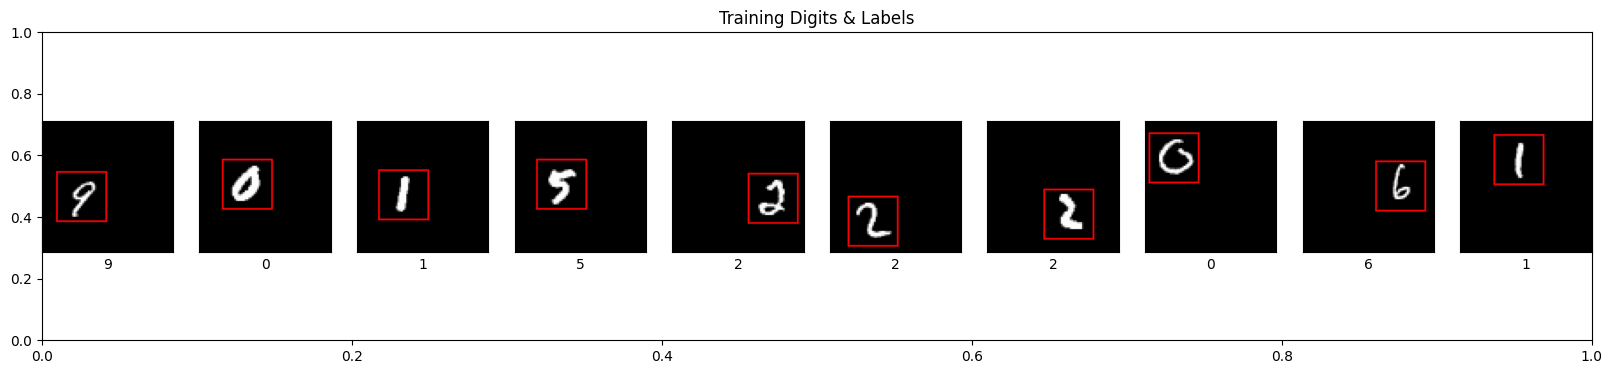

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 75, 75, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 73, 73,    │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d   │ (None, 36, 36,    │          0 │ conv2d[0][0]      │
│ (AveragePooling2D)  │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 34, 34,    │      4,640 │ average_pooling2… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d_1 │ (None, 17, 17,    │          0 │ conv2d_1[0][0]    │
│ (AveragePooling2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 15, 15,    │     18,496 │ average_pooling2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d_2 │ (None, 7, 7, 64)  │          0 │ conv2d_2[0][0]    │
│ (AveragePooling2D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 3136)      │          0 │ average_pooling2… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │    401,536 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification      │ (None, 10)        │      1,290 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bounding_box        │ (None, 4)         │        516 │ dense[0][0]       │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 426,638 (1.63 MB)

 Trainable params: 426,638 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 237s 250ms/step - bounding_box_loss: 0.0217 - bounding_box_mse: 0.0217 - classification_accuracy: 0.4138 - classification_loss: 1.5868 - loss: 1.6086 - val_bounding_box_loss: 0.0084 - val_bounding_box_mse: 0.0084 - val_classification_accuracy: 0.8928 - val_classification_loss: 0.3543 - val_loss: 0.3628
Epoch 2/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 270s 288ms/step - bounding_box_loss: 0.0067 - bounding_box_mse: 0.0067 - classification_accuracy: 0.9156 - classification_loss: 0.2764 - loss: 0.2832 - val_bounding_box_loss: 0.0044 - val_bounding_box_mse: 0.0044 - val_classification_accuracy: 0.9341 - val_classification_loss: 0.2237 - val_loss: 0.2280
Epoch 3/20
937/937 ━━━━━━━━━━━━━━━━━━━━ 229s 244ms/step - bounding_box_loss: 0.0036 - bounding_box_mse: 0.0036 - classification_accuracy: 0.9451 - classification_loss: 0.1843 - loss: 0.1879 - val_bounding_box_loss: 0.0023 - val_bounding_box_mse: 0.0023 - val_classification_accuracy: 0.9565 - val_classification_

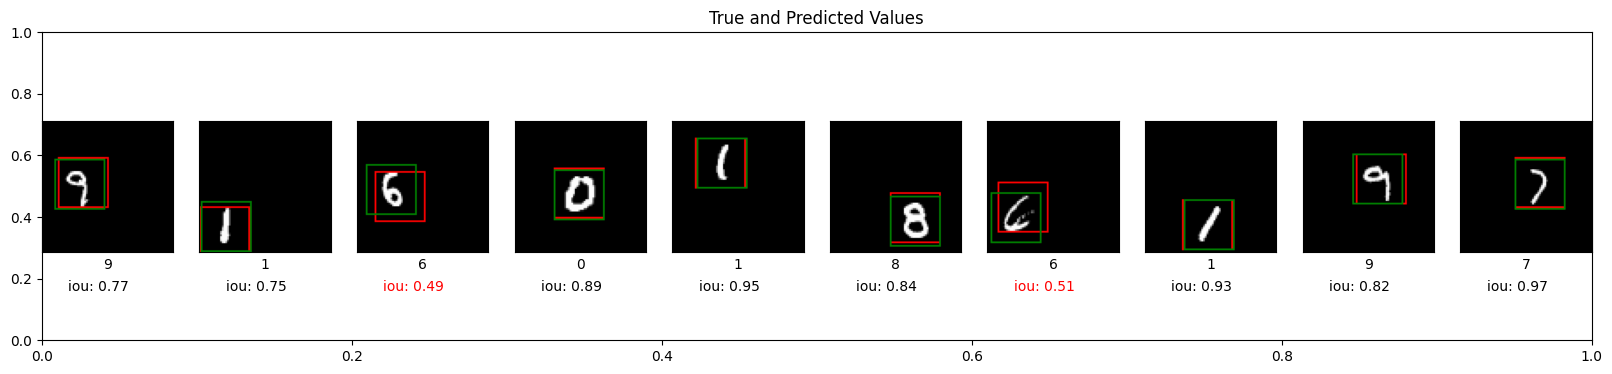

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.metrics import classification_report

im_width = 75
im_height = 75
use_normalized_coordinates = True

def draw_bounding_boxes_on_image_array(image, boxes, color=[], thickness=1, display_str_list=()):
    image_pil = Image.fromarray(image)
    rgbimg = Image.new("RGBA", image_pil.size)
    rgbimg.paste(image_pil)
    draw_bounding_boxes_on_image(rgbimg, boxes, color, thickness, display_str_list)
    return np.array(rgbimg)

def draw_bounding_boxes_on_image(image, boxes, color=[], thickness=1, display_str_list=()):
    for i in range(boxes.shape[0]):
        draw_bounding_box_on_image(image, boxes[i,1], boxes[i,0], boxes[i,3], boxes[i,2],
                                   color=color[i] if i < len(color) else 'red',
                                   thickness=thickness)

def draw_bounding_box_on_image(image, ymin, xmin, ymax, xmax, color='red', thickness=1):
    draw = ImageDraw.Draw(image)
    left, right = xmin * im_width, xmax * im_width
    top, bottom = ymin * im_height, ymax * im_height
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)

strategy = tf.distribute.get_strategy()
BATCH_SIZE = 64

def read_image_tfds(image, label):
    xmin = tf.random.uniform((), 0, 48, dtype=tf.int32)
    ymin = tf.random.uniform((), 0, 48, dtype=tf.int32)
    image = tf.reshape(image, (28, 28, 1))
    image = tf.image.pad_to_bounding_box(image, ymin, xmin, 75, 75)
    image = tf.cast(image, tf.float32) / 255.0
    bbox = [xmin/75, ymin/75, (xmin+28)/75, (ymin+28)/75]
    return image, (tf.one_hot(label, 10), bbox)

def get_training_dataset():
    with strategy.scope():
        ds = tfds.load("mnist", split="train", as_supervised=True)
        ds = ds.map(read_image_tfds).shuffle(5000).repeat().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return ds

def get_validation_dataset():
    with strategy.scope():
        ds = tfds.load("mnist", split="test", as_supervised=True)
        ds = ds.map(read_image_tfds).batch(10000).repeat()
    return ds

def dataset_to_numpy_util(training_dataset, validation_dataset, N):
    for train_digits, (train_labels, train_bboxes) in training_dataset.take(1):
        train_digits = train_digits.numpy()
        train_labels = np.argmax(train_labels.numpy(), axis=1)
        train_bboxes = train_bboxes.numpy()
    for val_digits, (val_labels, val_bboxes) in validation_dataset.take(1):
        val_digits = val_digits.numpy()
        val_labels = np.argmax(val_labels.numpy(), axis=1)
        val_bboxes = val_bboxes.numpy()
    return train_digits, train_labels, train_bboxes, val_digits, val_labels, val_bboxes

def feature_extractor(inputs):
    x = tf.keras.layers.Conv2D(16, 3, activation='relu')(inputs)
    x = tf.keras.layers.AvgPool2D(2)(x)
    x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
    x = tf.keras.layers.AvgPool2D(2)(x)
    x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
    x = tf.keras.layers.AvgPool2D(2)(x)
    return x

def dense_layers(inputs):
    x = tf.keras.layers.Flatten()(inputs)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    return x

def final_model(inputs):
    x = feature_extractor(inputs)
    x = dense_layers(x)
    class_out = tf.keras.layers.Dense(10, activation='softmax', name='classification')(x)
    bbox_out = tf.keras.layers.Dense(4, name='bounding_box')(x)
    return tf.keras.Model(inputs=inputs, outputs=[class_out, bbox_out])

def compile_model():
    inputs = tf.keras.Input(shape=(75, 75, 1))
    model = final_model(inputs)
    model.compile(optimizer='adam',
                  loss={'classification': 'categorical_crossentropy', 'bounding_box': 'mse'},
                  metrics={'classification': 'accuracy', 'bounding_box': 'mse'})
    return model

with strategy.scope():
    training_dataset = get_training_dataset()
    validation_dataset = get_validation_dataset()
    model = compile_model()

model.summary()
EPOCHS = 15
history = model.fit(training_dataset, steps_per_epoch=60000//BATCH_SIZE,
                    validation_data=validation_dataset, validation_steps=1, epochs=EPOCHS)

loss, class_loss, bbox_loss, class_acc, bbox_mse = model.evaluate(validation_dataset, steps=1)
print(f"\nValidation Accuracy: {class_acc:.4f}, Bounding Box MSE: {bbox_mse:.4f}\n")

train_digits, train_labels, train_bboxes, val_digits, val_labels, val_bboxes = dataset_to_numpy_util(
    training_dataset, validation_dataset, 10)

pred_classes, pred_bboxes = model.predict(val_digits, batch_size=64)
pred_labels = np.argmax(pred_classes, axis=1)

def intersection_over_union(pred_box, true_box):
    xmin_p, ymin_p, xmax_p, ymax_p = np.split(pred_box, 4, axis=1)
    xmin_t, ymin_t, xmax_t, ymax_t = np.split(true_box, 4, axis=1)
    overlap_xmin = np.maximum(xmin_p, xmin_t)
    overlap_ymin = np.maximum(ymin_p, ymin_t)
    overlap_xmax = np.minimum(xmax_p, xmax_t)
    overlap_ymax = np.minimum(ymax_p, ymax_t)
    overlap_area = np.maximum(overlap_xmax - overlap_xmin, 0) * np.maximum(overlap_ymax - overlap_ymin, 0)
    pred_area = (xmax_p - xmin_p) * (ymax_p - ymin_p)
    true_area = (xmax_t - xmin_t) * (ymax_t - ymin_t)
    union_area = pred_area + true_area - overlap_area + 1e-10
    return (overlap_area + 1e-10) / union_area

iou_scores = intersection_over_union(pred_bboxes, val_bboxes)
mean_iou = np.mean(iou_scores)
print(f"Mean IoU on Validation Set: {mean_iou:.4f}\n")

print("Classification Report:\n")
print(classification_report(val_labels, pred_labels))

def display_samples_with_boxes(digits, true_labels, pred_labels, true_bboxes, pred_bboxes, iou_scores):
    n = 10
    fig = plt.figure(figsize=(20, 4))
    for i in range(n):
        img = (digits[i] * 255).astype(np.uint8).reshape(75, 75)
        boxes = [true_bboxes[i], pred_bboxes[i]]
        colors = ['green', 'red']
        img_draw = draw_bounding_boxes_on_image_array(img, np.array(boxes), color=colors)

        ax = fig.add_subplot(1, n, i + 1)
        ax.imshow(img_draw)
        ax.set_title(f"T:{true_labels[i]} P:{pred_labels[i]}\nIoU:{iou_scores[i][0]:.2f}")
        ax.axis('off')
    plt.show()

display_samples_with_boxes(val_digits, val_labels, pred_labels, val_bboxes, pred_bboxes, iou_scores)

model.save("mnist_bbox_classifier.h5")
print("Model saved as mnist_bbox_classifier.h5")
